In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
#connecting to drive

drive.mount('/content/dive')

Mounted at /content/dive


In [4]:
data = pd.read_csv('/content/dive/MyDrive/Colab Notebooks/test_loan.csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [8]:
#Missing Value Handling

In [9]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [11]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [14]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [17]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

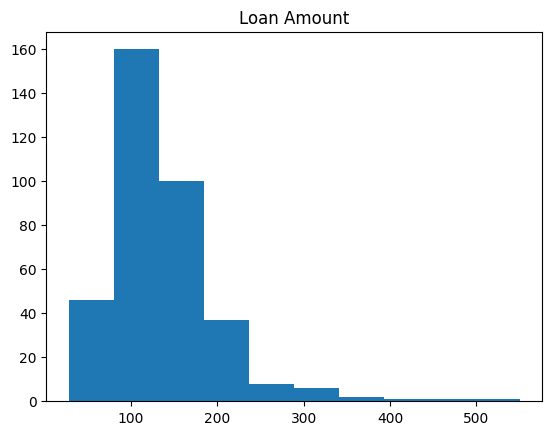

In [18]:
plt.hist(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [19]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [20]:
data.isna().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

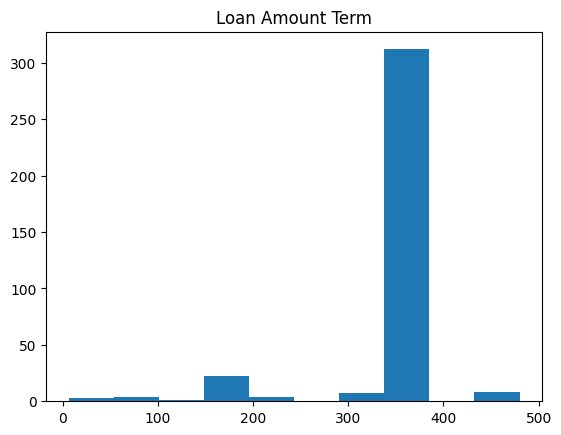

In [21]:
plt.hist(data['Loan_Amount_Term'])
plt.title('Loan Amount Term')
plt.show()

In [22]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [23]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

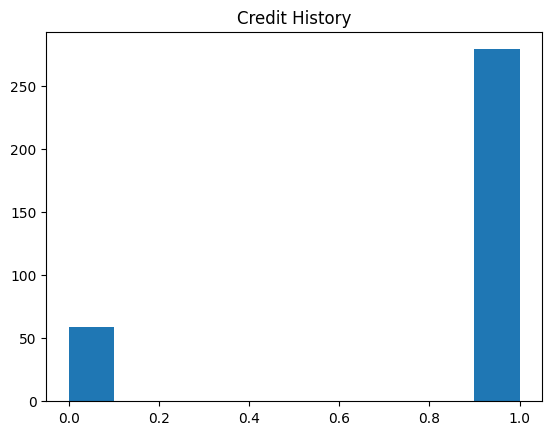

In [24]:
plt.hist(data['Credit_History'])
plt.title('Credit History')
plt.show()

In [25]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [26]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [27]:
#Detecting and Removing Outliers

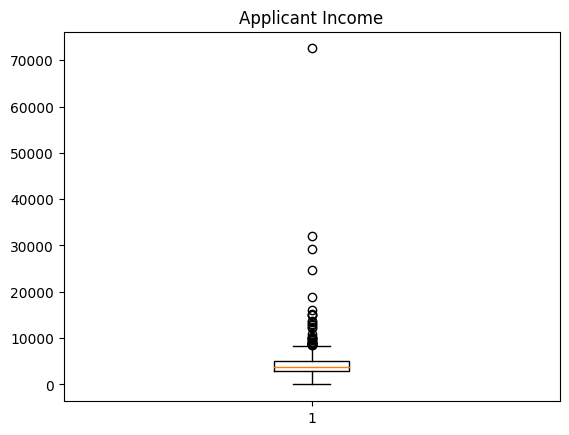

In [28]:
plt.boxplot(data['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

In [29]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q2 = data['ApplicantIncome'].quantile(0.5)
Q3 = data['ApplicantIncome'].quantile(0.75)

In [30]:
IQR = Q3 - Q1


In [31]:
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)

In [32]:
print(low,up)

-430.0 8354.0


In [33]:
data[(data['ApplicantIncome']<low) | (data['ApplicantIncome']>up)].index

Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')

In [34]:
#Trimming - deleting the outlier data

new_data = data.loc[(data['ApplicantIncome'] < up) & (data['ApplicantIncome'] > low)]
print('before removing outliers:',len(data))
print('after removing outliers:',len(new_data))
print('outliers:',len(data)-len(new_data))

before removing outliers: 367
after removing outliers: 335
outliers: 32


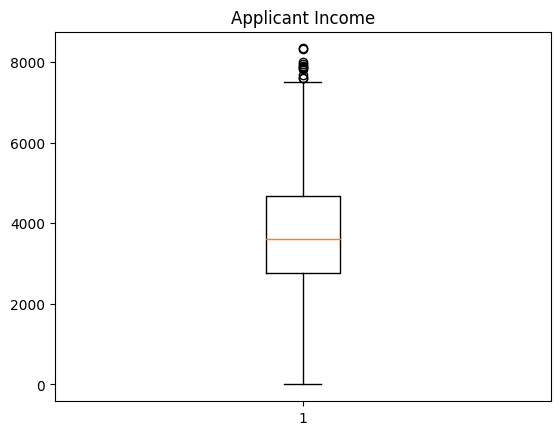

In [35]:
plt.boxplot(new_data['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

In [36]:
#capping - change the outlier values to upper (or) lower values
new_data = data.copy()
new_data.loc[(new_data['ApplicantIncome'] > up),'ApplicantIncome'] = up
new_data.loc[(new_data['ApplicantIncome'] < low),'ApplicantIncome'] = low

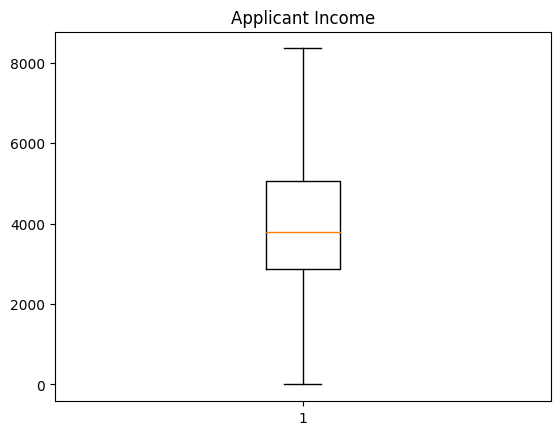

In [37]:
plt.boxplot(new_data['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

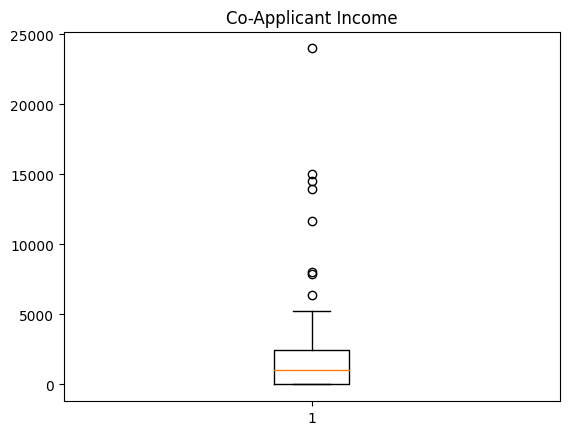

In [38]:
plt.boxplot(data['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

In [39]:
Q1a = data['CoapplicantIncome'].quantile(0.25)
Q2a = data['CoapplicantIncome'].quantile(0.5)
Q3a = data['CoapplicantIncome'].quantile(0.75)

In [40]:
IQRa = Q3a - Q1a

In [41]:
low_1 = Q1a - (1.5 * IQRa)
up_1 = Q3a + (1.5 * IQRa)

In [42]:
print(low_1,up_1)

-3645.75 6076.25


In [43]:
data[(data['CoapplicantIncome']<low_1) | (data['CoapplicantIncome']>up_1)].index

Int64Index([18, 25, 85, 123, 230, 237, 284, 351], dtype='int64')

In [44]:
#Trimming - deleting the outlier data

new_data_1 = data.loc[(data['CoapplicantIncome'] < up_1) & (data['CoapplicantIncome'] > low_1)]
print('before removing outliers:',len(data))
print('after removing outliers:',len(new_data_1))
print('outliers:',len(data)-len(new_data_1))

before removing outliers: 367
after removing outliers: 359
outliers: 8


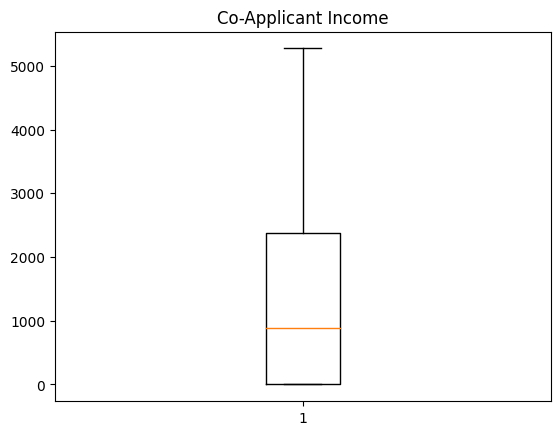

In [45]:
plt.boxplot(new_data_1['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

In [46]:
#capping - change the outlier values to upper (or) lower values
new_data_1 = data.copy()
new_data_1.loc[(new_data_1['CoapplicantIncome'] > up_1),'CoapplicantIncome'] = up_1
new_data_1.loc[(new_data_1['CoapplicantIncome'] < low_1),'CoapplicantIncome'] = low_1

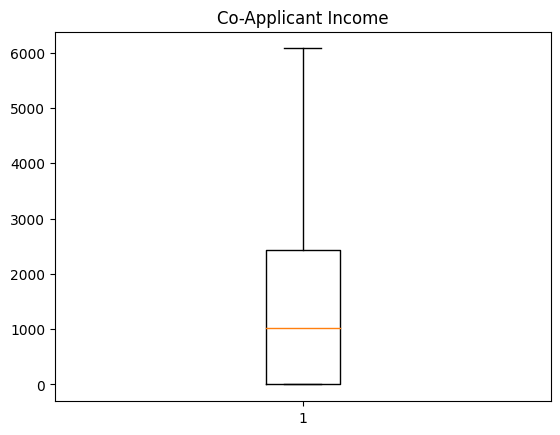

In [47]:
plt.boxplot(new_data_1['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

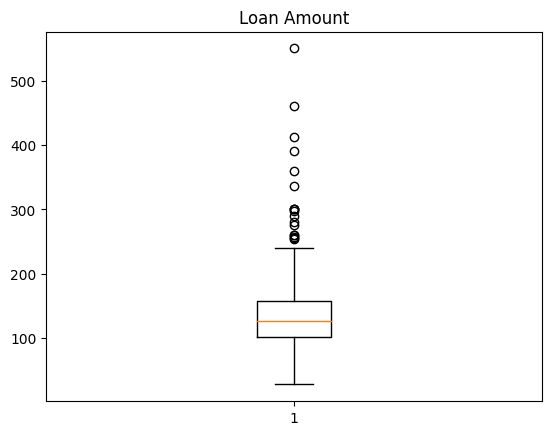

In [48]:
plt.boxplot(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()


In [49]:
Q1b = data['LoanAmount'].quantile(0.25)
Q2b = data['LoanAmount'].quantile(0.5)
Q3b = data['LoanAmount'].quantile(0.75)

In [50]:
IQRb = Q3b - Q1b

In [51]:
low_2 = Q1b - (1.5 * IQRb)
up_2 = Q3b + (1.5 * IQRb)

In [52]:
print(low_2,up_2)

16.25 242.25


In [53]:
data[(data['LoanAmount']<low_2) | (data['LoanAmount']>up_2)].index

Int64Index([8, 18, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 284, 285,
            331, 345, 350],
           dtype='int64')

In [54]:
#Trimming - deleting the outlier data

new_data_2 = data.loc[(data['LoanAmount'] < up_2) & (data['LoanAmount'] > low_2)]
print('before removing outliers:',len(data))
print('after removing outliers:',len(new_data_2))
print('outliers:',len(data)-len(new_data_2))

before removing outliers: 367
after removing outliers: 349
outliers: 18


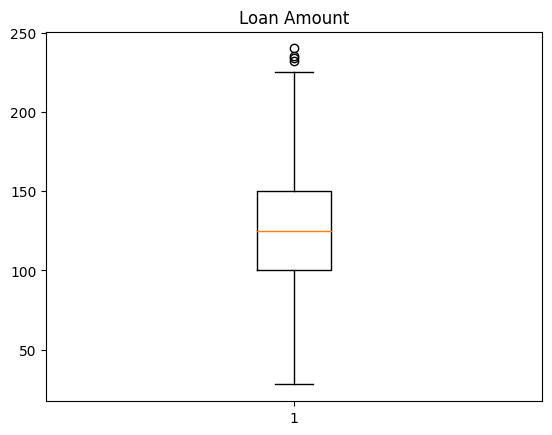

In [55]:
plt.boxplot(new_data_2['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [56]:
#capping - change the outlier values to upper (or) lower values
new_data_2 = data.copy()
new_data_2.loc[(new_data_2['LoanAmount'] > up_2),'LoanAmount'] = up_2
new_data_2.loc[(new_data_2['LoanAmount'] < low_2),'LoanAmount'] = low_2

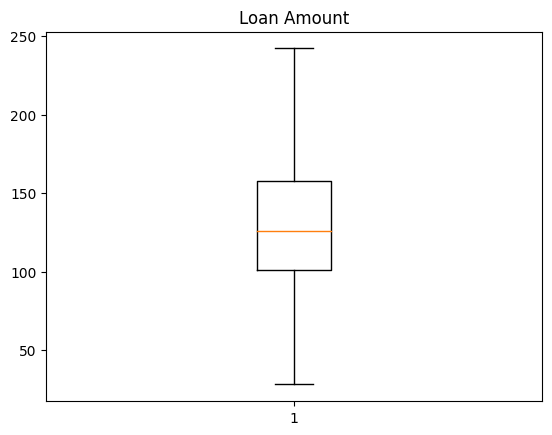

In [57]:
plt.boxplot(new_data_2['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [58]:
#Encoding

In [59]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()

In [62]:
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

In [63]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [64]:
data['Dependents'] = data['Dependents'].str.replace('+',' ')

<ipython-input-64-8ff0d85e0df4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+',' ')


In [65]:
data['Dependents'].unique()


array(['0', '1', '2', '3 '], dtype=object)

In [66]:
data['Dependents'] = data['Dependents'].astype('int32')

In [67]:
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [68]:
data = pd.get_dummies(data)

In [69]:
data.dtypes

Gender                     int64
Married                    int64
Dependents                 int32
Education                  int64
Self_Employed              int64
                           ...  
Loan_ID_LP002986           uint8
Loan_ID_LP002989           uint8
Property_Area_Rural        uint8
Property_Area_Semiurban    uint8
Property_Area_Urban        uint8
Length: 380, dtype: object

In [70]:
#scaling


In [72]:
data['ApplicantIncome'] = new_data['ApplicantIncome']
data['CoapplicantIncome'] = new_data_1['CoapplicantIncome']
data['LoanAmount'] = new_data_2['LoanAmount']

In [73]:
#Required columns for scaling

In [74]:
req_cols =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
x = data[req_cols]

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc = StandardScaler()

In [77]:
x.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = sc.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

<ipython-input-77-9c4637cc96e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = sc.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])


In [78]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.760162,-0.892107,-0.471845,0.266022
1,-0.596907,0.046623,-0.130383,0.266022
2,0.390612,0.234369,1.619605,0.266022
3,-0.974669,0.701230,-0.685258,0.266022
4,-0.494255,-0.892107,-1.154767,0.266022
